# Load data

## Imports

In [1]:
# Імпорт необхідних бібліотек
import os
import urllib.request
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# check GPUs available

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("GPU Details:")
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
GPU Details:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## load and prepair data

In [3]:
# Функція для завантаження та розпакування CIFAR-10 датасету
def download_and_extract_cifar10(destination_folder="data"):
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    filename = os.path.join(destination_folder, "cifar-10-python.tar.gz")

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    if not os.path.exists(filename):
        print("Downloading CIFAR-10 dataset...")
        urllib.request.urlretrieve(url, filename)
        print("Download complete.")

    with tarfile.open(filename, "r:gz") as tar:
        print("Extracting CIFAR-10 dataset...")
        tar.extractall(path=destination_folder)
        print("Extraction complete.")

# Виклик функції для завантаження та розпакування датасету
download_and_extract_cifar10()

# Завантаження CIFAR-10 датасету через TensorFlow
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Перетворення міток у one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Нормалізація даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Виведення форми масивів даних
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Extracting CIFAR-10 dataset...
Extraction complete.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 10)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 10)


## See data

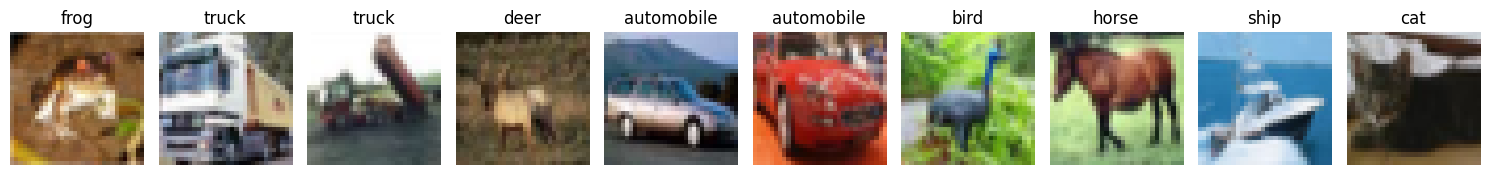

In [4]:
# Візуалізація деяких зображень з тренувального набору
def plot_sample_images(x, y, classes, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    axes = axes.flatten()
    for i in range(num_samples):
        axes[i].imshow(x[i])
        axes[i].set_title(classes[np.argmax(y[i])])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Назви класів CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Візуалізація перших 10 зображень з тренувального набору
plot_sample_images(x_train, y_train, class_names)

# Build model

## Model

In [5]:
# Build the model
model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 10 output neurons for 10 classes
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(x_train, y_train, epochs=25)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0